In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style


In [2]:
titanic=pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
def conversion(data,l_var):
    for col_name in l_var:
        data[col_name]=data[col_name].astype("object")
    return data

conversion(titanic,["Pclass", "Survived"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
def input_missing_values(df):
    
    for col in df.columns:
        
        if(df[col].dtype is float) or (df[col].dtype is int ):
            
            df[col]=df[col].fillna(df[col].median())
        if (df[col].dtype== object):
            
            df[col]=df[col].fillna(df[col].mode()[0])
            
    return df
titanic1= input_missing_values(titanic)

In [26]:
def parse_model (X,use_columns):
    if "Survived" not in X.columns:
        raise ValueError("la variable doit etre dans le jeu de donnée")
    target= X["Survived"]
    X=X[use_columns]
    return X, target
model_cols1=["SibSp","Parch","Fare"]
X,Y= parse_model(titanic,model_cols1)

In [27]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [29]:
lr=LogisticRegression()

In [30]:
def compute_score(clf,X,y,cv=5):
    xval=cross_val_score(clf,X,Y,cv=5)
    print("accuracy",(xval.mean(),xval.std()*2))
    return xval
compute_score(lr,X,Y)

accuracy (0.6746092524009792, 0.09167697476360834)


array([0.59776536, 0.74157303, 0.6741573 , 0.6741573 , 0.68539326])

# pour l amelioration du modele

In [31]:
survived=titanic1[titanic1.Survived==1]
dead=titanic1[titanic1.Survived==0]

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


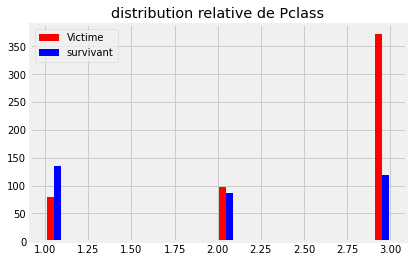

In [32]:
style.use('fivethirtyeight')
%matplotlib
%pylab inline

def plot_hist(feature,bins=20):
    x1=np.array(dead[feature].dropna())
    x2=np.array(survived[feature].dropna())
    plt.hist([x1,x2],label=["Victime","survivant"],bins=bins,color=["r",'b'])
    plt.legend(loc="upper left")
    plt.title('distribution relative de %s' %feature)
    plt.show()
plot_hist('Pclass')    

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


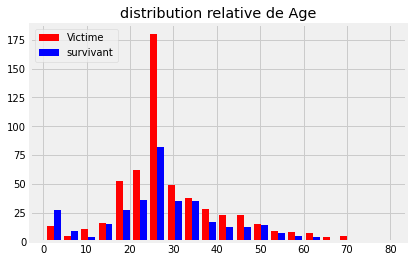

In [33]:
style.use('fivethirtyeight')
%matplotlib
%pylab inline

def plot_hist(feature,bins=20):
    x1=np.array(dead[feature].dropna())
    x2=np.array(survived[feature].dropna())
    plt.hist([x1,x2],label=["Victime","survivant"],bins=bins,color=["r",'b'])
    plt.legend(loc="upper left")
    plt.title('distribution relative de %s' %feature)
    plt.show()
plot_hist('Age')

In [34]:
train_new=pd.get_dummies(titanic1,columns=["Pclass"],dtype='int')

In [35]:
#train_new=pd.get_dummies(titanic1,columns=["Age"],dtype='int')

In [36]:
titanic1["Age"] = titanic1["Age"].fillna(titanic1["Age"].median())

In [37]:
def parse_model2(X):
    if "Survived" not in X.columns:
        raise ValueError("target column survived should belong to df")
    target = X["Survived"]
    to_dummy = ['Pclass', 'Sex']
    for dum in to_dummy:
        split_temp = pd.get_dummies(X[dum], prefix=dum)
        for col in split_temp:
            X[col] = split_temp[col]
        del X[dum]
    X['Age'] = X['Age'].fillna(X['Age'].median())
    to_del = ["PassengerId", "Name", "Cabin", "Embarked", "Survived", "Ticket"]
    for col in to_del:
        del X[col]
    return X, target
X, y = parse_model2(titanic1.copy())
compute_score(lr, X, y)
    

accuracy (0.7867553825874083, 0.04872728221404518)


/home/deepbright/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/deepbright/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

array([0.7877095 , 0.7752809 , 0.78089888, 0.75842697, 0.83146067])

In [38]:
from sklearn import preprocessing

def dummify_features(df):
    """
    Transform categorical variables to dummy variables.

    Parameters
    ----------
    df: dataframe containing only categorical features

    Returns
    -------
    X: new dataframe with dummified features
       Each column name becomes the previous one + the modality of the feature

    enc: the OneHotEncoder that produced X (it's used later in the processing chain)
    """
    colnames = df.columns
    le_dict = {}
    for col in colnames:
        le_dict[col] = preprocessing.LabelEncoder()
        le_dict[col].fit(df[col])
        df.loc[:, col] = le_dict[col].transform(df[col])

    enc = preprocessing.OneHotEncoder()
    enc.fit(df)
    X = enc.transform(df)

    dummy_colnames = [cv + '_' + str(modality) for cv in colnames for modality in le_dict[cv].classes_]
    # for cv in colnames:
    #     for modality in le_dict[cv].classes_:
    #         dummy_colnames.append(cv + '_' + modality)

    return X, dummy_colnames, enc
to_dummify = ["Pclass"]
X_dummy, dummy_columns, dummy_encoder = dummify_features(titanic[to_dummify])
X_dummy = pd.DataFrame(X_dummy.toarray(), columns=dummy_columns)

/home/deepbright/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [39]:
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [40]:
titanic1['titre']=titanic1['Name'].apply(lambda x:x.split(",")[1].split(".")[0].strip())

In [41]:
titanic1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titre
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [42]:
titanic1['surnom']=titanic1['Name'].map(lambda x: '(' in x)

In [43]:
titanic1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titre,surnom
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Mr,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,Mr,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,Rev,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S,Miss,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,False


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Estimator = RandomForestClassifier(random_state=42)
parameters={
    'n_estimators':[100,150,200,250,300],
    'max_depth': np.arange(6,16,2),
    'min_samples_split':np.arange(10,30,5),
    'min_samples_leaf':np.arange(5,20,5)
    
}

model2=GridSearchCV(Estimator,parameters,verbose=1,cv=5,n_jobs=-1)
model2.fit(X_train,Y_train)


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 6,  8, 10, 12, 14]),
                         'min_samples_leaf': array([ 5, 10, 15]),
                         'min_samples_split': array([10, 15, 20, 25]),
                         'n_estimators': [100, 150, 200, 250, 300]},
             verbose=1)

In [48]:
model2.best_params_

{'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 150}

In [49]:
model2.best_score_

0.7064315965724417

In [50]:
model2.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=150, random_state=42)